<a href="https://colab.research.google.com/github/PGM-Lab/2023-ProbAI/blob/main/Day1/notebooks/students_PPLs_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
Let's begin by installing and importing the modules we'll need.

In [ ]:
!pip install -q --upgrade pyro-ppl torch graphviz
import pyro
import torch
import pyro.distributions as dist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.5/732.5 kB 18.4 MB/s eta 0:00:00


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions** (http://docs.pyro.ai/en/stable/distributions.html) :


Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

In [ ]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).


In [ ]:
sample = normal.sample()
sample

tensor(-0.5125)

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[ 0.3494,  1.5369, -0.0528,  0.2923,  1.1200],
         [ 0.5620,  2.1929, -0.8866, -0.0314,  1.5297],
         [-1.0121, -0.2184,  0.1054,  0.9920, -1.2109],
         [ 0.6203, -0.2369, -0.4233, -0.0433,  0.6142]],

        [[-1.4073, -0.7640, -0.0517, -0.7666,  0.0270],
         [-1.2736,  1.3069,  1.2396,  0.6301, -0.1661],
         [-0.3009, -1.5408, -1.2803,  1.8469,  0.6391],
         [-0.0348,  0.4062, -0.2878, -2.4241,  0.4834]],

        [[ 2.6001, -0.5994, -1.0425, -1.3948,  0.1051],
         [ 0.4001, -1.9279, -0.8510, -0.9967, -1.2338],
         [ 2.5268,  0.8260,  0.0164,  1.4364, -0.4866],
         [ 1.1739,  2.1341,  0.4845,  0.4962,  0.3747]]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We can query the **dimensionlity** of a tensor with the ``shape`` property

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Operations, like **log-likelihood**, are defined over tensors.

In [ ]:
normal.log_prob(sample)

tensor([[[-0.9869, -0.9370, -0.9196, -1.6906, -1.5401],
         [-1.1505, -1.6124, -1.4727, -1.0882, -0.9529],
         [-1.8837, -1.9899, -2.1947, -0.9697, -0.9838],
         [-0.9568, -1.7595, -0.9281, -1.3244, -1.7178]],

        [[-1.1509, -0.9287, -1.5301, -1.3275, -1.0882],
         [-1.0311, -1.2753, -0.9727, -1.0573, -1.7808],
         [-1.3629, -0.9191, -0.9511, -1.5163, -3.3538],
         [-7.4071, -1.2519, -1.6354, -1.2575, -1.0093]],

        [[-0.9572, -3.8765, -0.9444, -1.0119, -1.0642],
         [-1.2516, -1.2426, -1.1825, -0.9190, -5.7825],
         [-0.9203, -0.9877, -0.9245, -0.9614, -1.7357],
         [-0.9220, -1.0455, -1.0290, -1.3419, -1.3879]]])

In [ ]:
torch.sum(normal.log_prob(sample))

tensor(-89.3547)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

**Multiple distributions** can be embedded in single object.

* Below we define **three Normal distributions with different means but the same scale** in a single object.


In [ ]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [ ]:
normal.sample()

tensor([0.5263, 1.4322, 3.3168])

In [ ]:
normal.log_prob(normal.sample())

tensor([-1.0949, -0.9764, -1.1274])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise: Open the notebook and play around</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models** (http://pyro.ai/examples/intro_part_i.html) :


* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model, where temperture is modeled using a random Normal variable.

In [ ]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(18.8573)
tensor(14.7695)


See how the model behaves as a stochastic function, which **returns a different value everytime it is invoked**. 

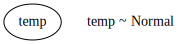

In [ ]:
# Visualize the model
pyro.render_model(model, render_distributions=True)



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

In Pyro, a stochastic method is defined as a **composition of primitive stochastic functions**.

*The temperature Model:* 
We consider the presence of a **temperature sensor**. 
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.


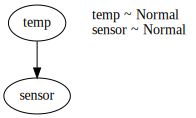

In [ ]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

# Visualize the model
pyro.render_model(model, render_distributions=True)

In [ ]:
# Sample from the model
out1 = model()
out1

(tensor(11.9230), tensor(11.5363))

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>



The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$




In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 3. **Pyro’s inference** (http://pyro.ai/examples/intro_part_ii.html) :

### Auxiliary inference functions

To make inference on Pyro, we will use a variational inference method, which performs gradient-based optimization to solve the inference problem. More details will be given on Day 2. 

In [ ]:
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoNormal


# Stochastic Variational Inference
def svi(model, obs, guide=None, num_steps = 500, plot = False, verbose=False, lr=0.01):
    
    torch.manual_seed(999)

    pyro.clear_param_store()
    
    if guide is None:
        guide = AutoNormal(model)
    
    svi = pyro.infer.SVI(model=model,
                         guide=guide,
                         optim=SGD({"lr": lr, "momentum":0.1}),
                         loss=Trace_ELBO())

    elbo, a,b  = [], [], []
    
    for t in range(num_steps):
        elbo.append(-svi.step(obs))
        if t%100==0:
            print('Step: '+str(t)+'. ELBO: ' +str(elbo[-1]))
            

    if (plot):
        plt.plot(elbo[2:])
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("ELBO");
        plt.show()
        
    if verbose:
        print("Inference results:")
        for name, value in pyro.get_param_store().items():
            print(name, pyro.param(name).item())

* To make inference in Pyro over a given model we need to define a *guide*. This *guide* must have the same signature as its counterpart model. 

* The guide must provide samples for those variables of the model that are not observed, again using the ``pyro.sample`` construct. 

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize over these parameters. 

* All of this will be explained in detail on Day 2.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the posterior distribution over the real temperature. 

This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor(18.0)}

def model(obs):
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 0.1), obs=obs['sensor'])

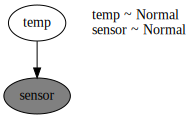

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. This allows us to query the **posterior probability distribution**: 


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$



Step: 0. ELBO: -16147.421896100044
Step: 100. ELBO: -5.638109087944031
Step: 200. ELBO: -2.748673915863037
Step: 300. ELBO: -2.5427181720733643
Step: 400. ELBO: -2.9723092317581177


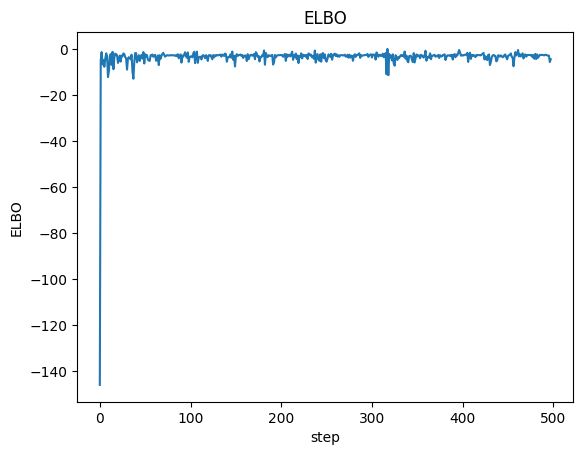

P(Temperature|Sensor=18.0) = 
Normal(loc: 18.043657302856445, scale: 0.11020330339670181)



In [ ]:
#Run inference
svi(model,obs, plot=True)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.temp").item(), pyro.param("AutoNormal.scales.temp").item()))
print("")


* Inference is an **optimization procedure**. 

* The **ELBO function is maximized** during the variational inference process.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.2  Learning from a bunch of observations

* Let us assume that we have a **set of observations** of the temperature at different time steps. 

* Following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation** using a standard ``for-loop``.

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(15.0, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

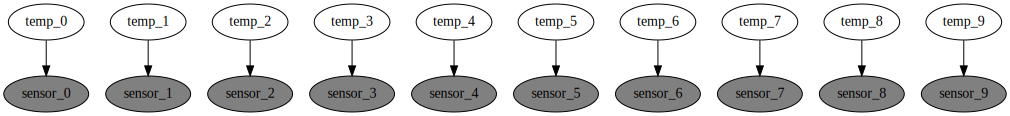

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

In [ ]:
#Run inference
svi(model, obs, verbose=True)

Step: 0. ELBO: -2270.0551319122314
Step: 100. ELBO: -191.25132358074188
Step: 200. ELBO: -55.761174857616425
Step: 300. ELBO: -42.96208891272545
Step: 400. ELBO: -40.83998817205429
Inference results:
AutoNormal.locs.temp_0 17.427947998046875
AutoNormal.scales.temp_0 0.8459584712982178
AutoNormal.locs.temp_1 17.941848754882812
AutoNormal.scales.temp_1 0.8458547592163086
AutoNormal.locs.temp_2 18.27560806274414
AutoNormal.scales.temp_2 0.8490453958511353
AutoNormal.locs.temp_3 17.2302303314209
AutoNormal.scales.temp_3 0.902186930179596
AutoNormal.locs.temp_4 19.30435562133789
AutoNormal.scales.temp_4 0.7995322346687317
AutoNormal.locs.temp_5 20.94558334350586
AutoNormal.scales.temp_5 0.9167338013648987
AutoNormal.locs.temp_6 19.312156677246094
AutoNormal.scales.temp_6 0.8623718619346619
AutoNormal.locs.temp_7 19.935022354125977
AutoNormal.scales.temp_7 0.8151288032531738
AutoNormal.locs.temp_8 18.566059112548828
AutoNormal.scales.temp_8 0.8957094550132751
AutoNormal.locs.temp_9 19.039104


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

What if we do **not know the mean temperature**? 

* We can **infer it from the data** by, e.g., using a **maximum likelihood** approach,
$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \ln \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i, $ where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$. 

* The graphical model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="200">
</center>
* For now we do not consider the **underlying inference problem** We just define the model and let the **PPL's engine** make the work for us. 

* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize. 


In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

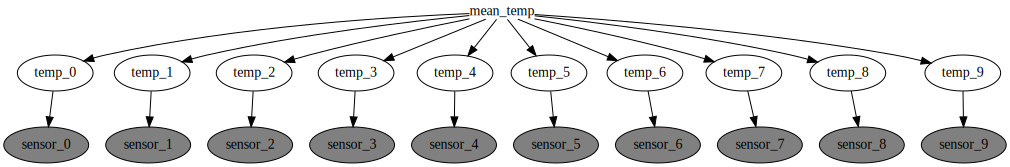

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_params=True)

In [ ]:
#Run inference
svi(model, obs)

#Print results
print("Estimated Mean Temperature (MLE):")
mle_mean_temp = pyro.param("mean_temp").item() 
print(mle_mean_temp)

Step: 0. ELBO: -2270.0551319122314
Step: 100. ELBO: -247.7783883213997
Step: 200. ELBO: -56.34299427270889
Step: 300. ELBO: -23.71842250227928
Step: 400. ELBO: -18.077348172664642
Estimated Mean Temperature (MLE):
19.568622589111328


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**:

* We treat the unknown quantity as a **random variable**.

This model can graphically be represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="200">
</center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>



In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

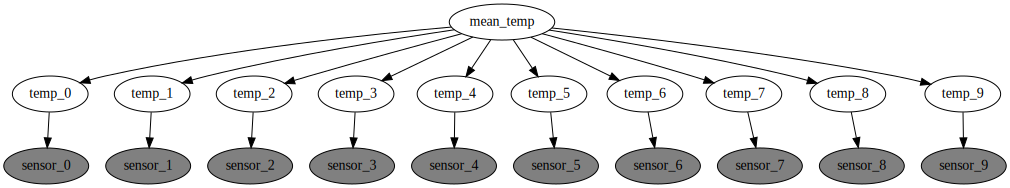

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We perform inference over this model:

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$


In [ ]:
import time
        
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. ELBO: -2015.5953212976456
Step: 100. ELBO: -286.3637079000473
Step: 200. ELBO: -57.629184663295746
Step: 300. ELBO: -25.598895251750946
Step: 400. ELBO: -23.29996982216835
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

10.3364098072052 seconds


---
* Observe that the result of the learning is **not a point estimate**.

* We have a **posterior distribution** which captures **uncertainty** about the estimation.

---

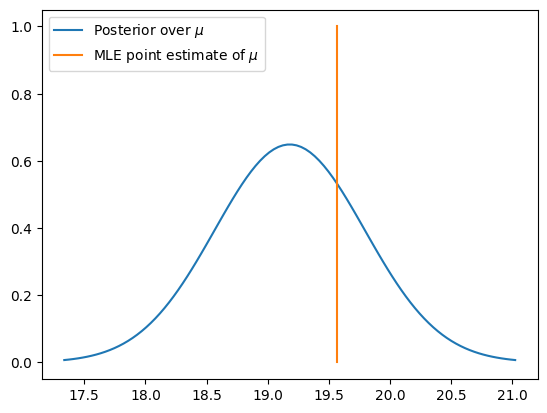

In [ ]:
import numpy as np
import scipy.stats as stats

mu = pyro.param("AutoNormal.locs.mean_temp").item()
scale = pyro.param("AutoNormal.scales.mean_temp").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior over $\mu$')
point = mle_mean_temp # Previously calculated above
plt.plot([point, point],[0., 1.], label='MLE point estimate of $\mu$')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

Pyro can exploit **conditional independencies and vectorization** to make inference much faster. 

* This can be done with the construct **``plate``**. 

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepdendent** from another variables $s_j$ and $t_j$ given $\mu_t$. 

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="200">
</center>


In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

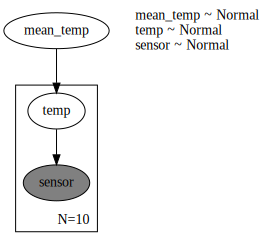

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**. 

We can here make a distinction between **local** and **global** random variables: 

* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples). 


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**. 

In [ ]:
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. ELBO: -2015.5951830148697
Step: 100. ELBO: -286.36370027065277
Step: 200. ELBO: -57.62918245792389
Step: 300. ELBO: -25.59889566898346
Step: 400. ELBO: -23.29996994137764
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

2.3698222637176514 seconds



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 1: </span>The role of *prior distributions* in learning**

In this exercise we just want to illustrate how the output of learning depends of the particular prior we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

Step: 0. ELBO: -1630.7117037131788
Step: 100. ELBO: -236.97139687949675
Step: 200. ELBO: -50.4374669294155
Step: 300. ELBO: -23.83190746459251
Step: 400. ELBO: -22.20083717835101
P(Temperature|Sensor=18.0) = 
Normal(loc: 17.34322166442871, scale: 0.6157534122467041)


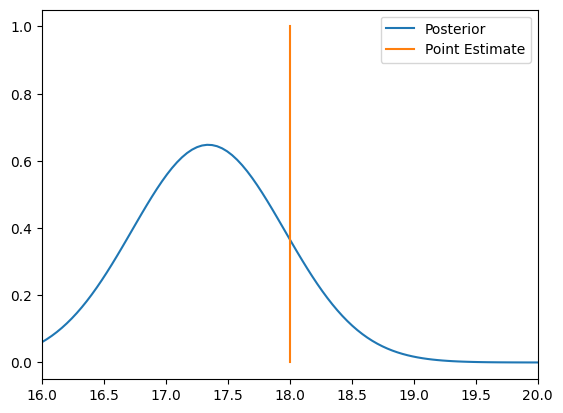

In [ ]:
#The observatons   
sample_size = 10
obs = {'sensor': torch.tensor(np.random.normal(18,2,sample_size))}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, obs)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))

x = np.linspace(16, 20, 100)
plt.plot(x, stats.norm.pdf(x, pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.xlim(16,20)
plt.legend()
plt.show()


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# **4.  Icecream Shop**


We have an ice-cream shop and assume thaat we **record the ice-cream sales and the average temperature of the day** (using a temperature sensor).

* We know that **temperature affects the sales** of ice-creams.

* We want to **model** how temperature affects ice-cream sales.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/Ice-cream_shop_-_Florida.jpg" alt="Drawing" width=300 >
</center>



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We have **observations** from temperature and sales.

* Sales are modeled with a **Poisson** distribution:

>- The rate of the Poisson distribution **linearly depends of the real temperature**.

The figure below provides a graphical and probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model.png?raw=1" alt="Drawing" width=700>
</center>



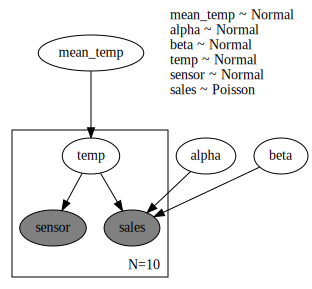

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


We again run the **(variational) inference engine** for estimating the posterior distributions.
* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.


Step: 0. ELBO: -6918.239556312561
Step: 100. ELBO: -1706.8237750530243
Step: 200. ELBO: -1406.9381275177002
Step: 300. ELBO: -1167.6916592121124
Step: 400. ELBO: -969.2326389551163
Step: 500. ELBO: -804.8421595096588
Step: 600. ELBO: -669.4959982037544
Step: 700. ELBO: -560.748676598072
Step: 800. ELBO: -474.4860295057297
Step: 900. ELBO: -392.10573947429657
Step: 1000. ELBO: -340.6572550535202
Step: 1100. ELBO: -280.30739521980286
Step: 1200. ELBO: -257.10428792238235
Step: 1300. ELBO: -207.26774513721466
Step: 1400. ELBO: -189.91825646162033
Step: 1500. ELBO: -164.52892982959747
Step: 1600. ELBO: -154.52784144878387
Step: 1700. ELBO: -126.2596897482872
Step: 1800. ELBO: -117.71682924032211
Step: 1900. ELBO: -112.76166027784348
Step: 2000. ELBO: -100.08541929721832
Step: 2100. ELBO: -98.10373902320862
Step: 2200. ELBO: -92.16434901952744
Step: 2300. ELBO: -80.70336270332336
Step: 2400. ELBO: -79.52297556400299
Step: 2500. ELBO: -71.62711155414581
Step: 2600. ELBO: -76.57995223999023
S

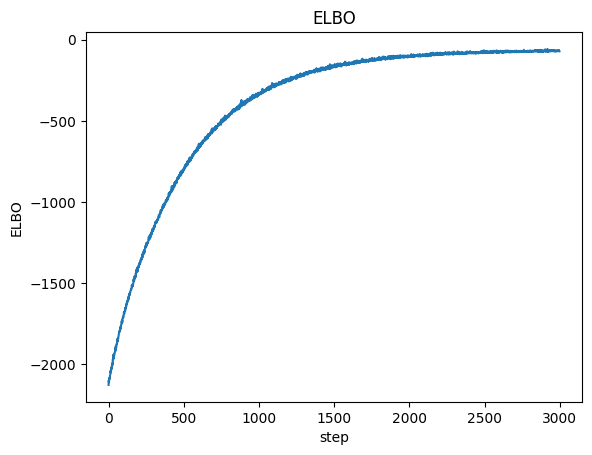

Posterior temperature mean
Normal(loc: 17.972440719604492, scale: 0.5351166725158691)

Posterior alpha
Normal(loc: 39.841854095458984, scale: 1.1383755207061768)

Posterior beta
Normal(loc: 0.5334267616271973, scale: 0.12256141752004623)


In [ ]:
#Run inference
svi(model, obs, num_steps = 3000, lr = 0.001, plot=True)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### <span style="color:red">Exercise 2: Introduce Humidity in the Icecream shop model </span> 
* Assume that we also have a bunch of **humidity sensor measurements**.
* Assume also that the **sales are also linearly influenced by the humidity**.

**Extend the previous model** with information about humidity measurements.

The figure provides a graphical and probabilistic specification of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model-Humidity.png?raw=1" alt="Drawing" width=900>
</center>




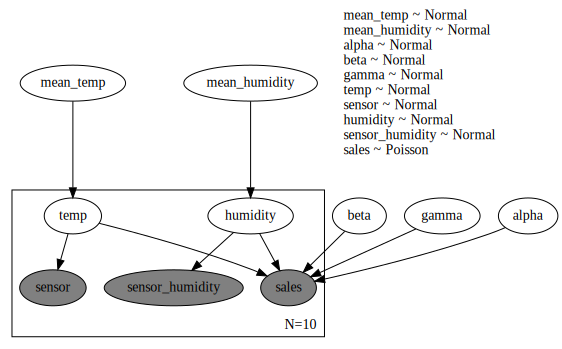

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}


def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(80.0, 5.0))

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    
    ## Introduce a coefficient for the humidity "gamma" following a Normal distribution

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        #Add the 'humidity' variable and the 'sensor_humidity' variable. The distributions are Normal with fixed variance, but the mean parameter depends on the previously defined random variables. Look at the graph below for help. 


        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp + ???)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_distributions=True)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.


In [ ]:
#Run inference
svi(model, obs, num_steps=3000, lr=0.001)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior Humidity Mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_humidity").item(), pyro.param("AutoNormal.scales.mean_humidity").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))
print("")
print("Posterior Gamma")
print(dist.Normal(pyro.param("AutoNormal.locs.gamma").item(), pyro.param("AutoNormal.scales.gamma").item()))


Step: 0. ELBO: -43415.62390649319
Step: 100. ELBO: -32385.00171458721
Step: 200. ELBO: -26350.05345070362
Step: 300. ELBO: -21488.4861702919
Step: 400. ELBO: -17607.420937776566
Step: 500. ELBO: -14453.095369696617
Step: 600. ELBO: -11926.55991435051
Step: 700. ELBO: -9850.370500385761
Step: 800. ELBO: -8091.017839193344
Step: 900. ELBO: -6682.580929279327
Step: 1000. ELBO: -5537.713232040405
Step: 1100. ELBO: -4582.030882298946
Step: 1200. ELBO: -3812.805592775345
Step: 1300. ELBO: -3114.99720621109
Step: 1400. ELBO: -2678.093121111393
Step: 1500. ELBO: -2197.645421206951
Step: 1600. ELBO: -1855.6752140522003
Step: 1700. ELBO: -1547.314620256424
Step: 1800. ELBO: -1284.7616971731186
Step: 1900. ELBO: -1079.2135288119316
Step: 2000. ELBO: -926.1471571326256
Step: 2100. ELBO: -821.3310233354568
Step: 2200. ELBO: -681.4237759709358
Step: 2300. ELBO: -590.1314925253391
Step: 2400. ELBO: -532.2307305335999
Step: 2500. ELBO: -449.05110985040665
Step: 2600. ELBO: -413.5098383426666
Step: 270

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 5.  **Temporal Models**

If we believe there is a temporal dependency between the variables, we can also encode this in the model. 

* E.g. the current **real temperature must be similar to the real temperature in the previous time step**.

* This temporal dependency can **be modeled** using a **for-loop** in Pyro

Consider the **graphical representation**.


<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/tempmodel-temporal-III.png" alt="Drawing" style="width: 350px;" >



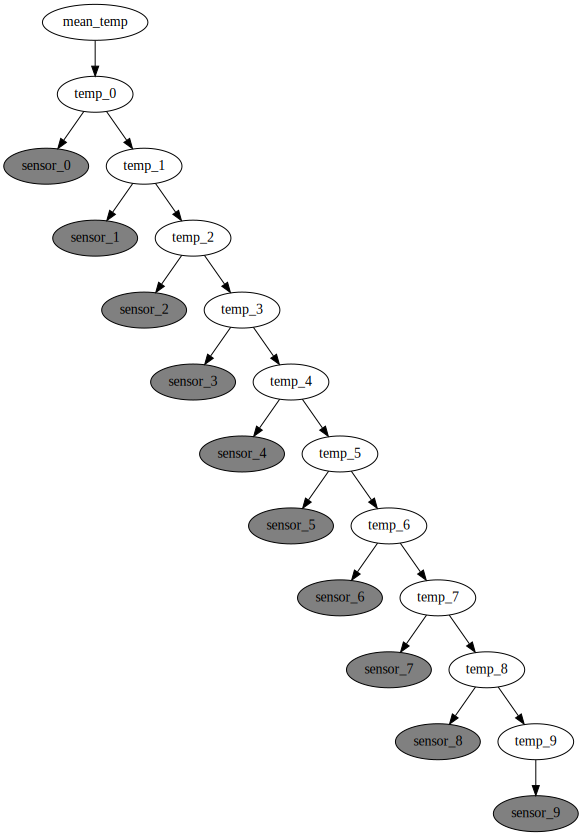

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])
        prev_temp = temp

#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [ ]:
import time
        
#Run inference
svi(model, obs, guide)

smooth_temp=[]
for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())

print('Finished')

Step: 0. ELBO: -20.270625352859497
Step: 100. ELBO: -21.953279733657837
Step: 200. ELBO: -20.95933836698532
Step: 300. ELBO: -19.39970552921295
Step: 400. ELBO: -20.462097346782684
Finished


We can now plot the **observered measurements** of the temperature **against** the inferred **real temperature**.

* By querying the **local hidden** we can **smooth** the temperature.

* The **recovered temperature** is much less noisy than the measured one. 

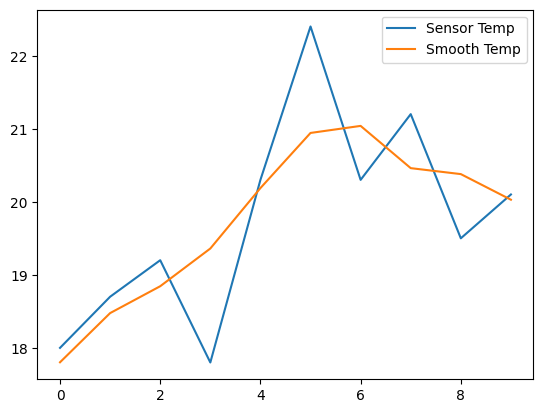

In [ ]:
import matplotlib.pyplot as plt
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### <span style="color:red">Exercise 3:  Temporal Extension of the Iceacream shop model </span> 

This exercise **extends** Excersise 2.
* Assume temperature depends of the **temperature in the previous day**.
* Assume humidity depends of the **humidity in the previous day**.
* Assume sales depends on the **current temperature and humidity**.
* Use the **graphical representation below for reference**.

N.b. The plate representation has to be impemented in Pyro using a **``for-loop``**.
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/icecream-model-temporal.png" alt="Drawing" width=700 >




In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}



def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(8.0, 2.0))


    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))

    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
            #Introduce the 'humidity' variable at time 0.

        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
            #Introduce the f'humidity_{i}' variable defining the transition
            
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

        #Introduce the f'sensor_humidity_{i}' variable. 
        
        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.01),alpha + beta*temp + ????)
        sales = pyro.sample(f'sales_{i}', dist.Poisson(rate), obs=obs['sales'][i])

        prev_temp = temp
        #Keep humidity for the next time step. 
        prev_humidity = humidity


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']), constraint=constraints.positive)
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    humidity_mean = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(0.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(0.0))
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param(f'meanH_{i}', obs['sensor_humidity'][i])
        scaleH_i = pyro.param(f'scaleH_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        humidity_i = pyro.sample(f'humidity_{i}', dist.Normal(meanH_i, scaleH_i))

In [ ]:
import time
        
#Run inference
svi(model, obs, guide=guide, num_steps = 1000, lr=0.001)

smooth_temp=[]
smooth_humidity=[]

for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())
    smooth_humidity.append(pyro.param(f'meanH_{i}').item())

print('Finished')

Step: 0. ELBO: -975.2505025863647
Step: 100. ELBO: -501.32640743255615
Step: 200. ELBO: -492.1584714651108
Step: 300. ELBO: -508.6205230951309
Step: 400. ELBO: -477.8078851699829
Step: 500. ELBO: -465.7882944345474
Step: 600. ELBO: -431.660251557827
Step: 700. ELBO: -430.0697748661041
Step: 800. ELBO: -410.5656458735466
Step: 900. ELBO: -431.8430261015892
Finished


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We can plot the observered measurements of the temperature against the **inferred real temperature** by our model. 

* The **recovered temperature** is much less noisy than the real one.


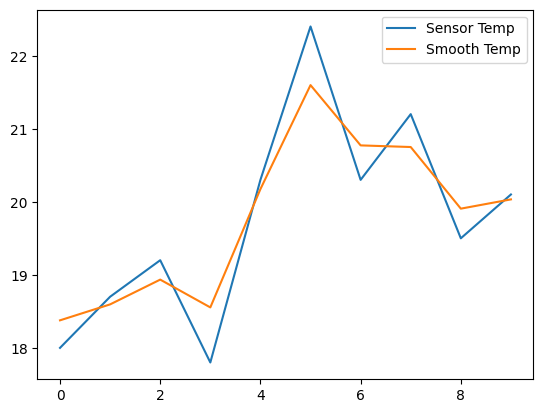

In [ ]:
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

---
* We can plot the observered measurements of the humidity against the **inferred real humidity** by our model. 

* The **recovered humidity** is much less noisy than the real one.

---


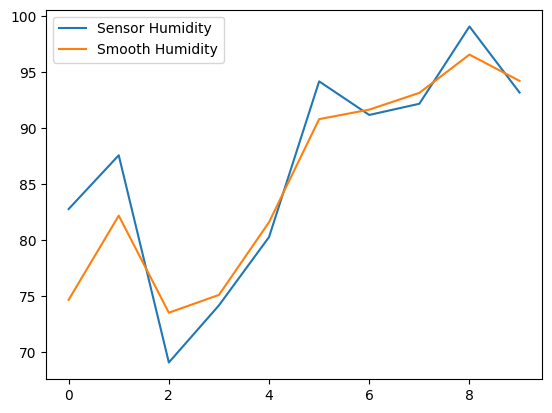

In [ ]:
humidity = torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])
plt.plot(humidity.detach().numpy(), label='Sensor Humidity')
plt.plot(smooth_humidity, label='Smooth Humidity')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>
